```{figure} ../thumbnails/myThumbnail.png
:align: center
```

# Elementos de Mecánica Cuántica

In [1]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex
import copy 

ModuleNotFoundError: No module named 'macro_tQ'

## Axiomas de la Mecánica Cuántica

La Mecánica Cuántica es una teoría fundamentada en unos pilares axiomáticos cuya selección admite cierta flexibilidad. La más aceptada constituye lo que se denomina la <i>interpretación de Copenhagen</i>.

:::{card}

**Postulado I** :  *Vector de estado*

^^^

En un instante, $t$, la máxima información accesible de un <i>sistema cuántico aislado</i> está asociada a un vector $\ket{\psi}$, de norma unidad, $\braket{\psi}{\psi}=1$,  
perteneciente a un espacio de Hilbert $\Hil$, cuya dimensión compleja $N$ equivale al número de grados de libertad del sistema. 

:::

-  El vector de estado es el objecto matemático que contiene la máxima información accesible. La palabra *estado* es engañosa por cuanto parece indicar que el sistema *está* en alguna estado concreto.  El vector de estado recibe también el nombre de *función de onda*. 
<br>

- La dimensión de $\Hil$ está relacionada con el número de grados de libertad del sistema.
<br>

- La *fase global* del vector de estado no contiene información: dos vectores que difieran en una fase global representan al mismo estado ningún experimento permite distinguirlos
<br>
$$
\ket{\psi} \sim \ket{\psi'} =  e^{i\varphi}\ket{\psi} \, ,
$$
<br>

:::{card}

**Postulado  II :**  *Evolución con el tiempo*

^^^

El cambio continuo en el tiempo de  $\ket{\psi(t)}$ de un sistema cuya dinámica está gobernada por un Hamiltoniano $H(t)$,  es <i>determinista</i> y es solución de la <i>Ecuación de Schrödinger</i>

$$
 \frac{\partial\ket{\psi(t)}}{\partial t} =-\frac{i}{\hbar} H(t) \ket{\psi(t)} \, \label{eqschr}
$$

:::

Lo que caracteriza la evolución  dinámica de un sistema cuántico está contenido en un *operador hermítico* $H = H^\dagger$ que se denomina **operador Hamiltoniano**

Supongamos que el sistema se prepara a $t=0$ en un cierto estado $\ket{\psi(0)}$

La ecuación de Schrödinger es una ecuación diferencial ordinaria (una sola variable) para un vector.

:::{card}

**Postulado III:** *Medidas de Von Neumann*   <a id='postul_III_medida'></a>

^^^

A una magnitud física medible le está asociado   un operador hermítico  $ A= A^\dagger$ que denominamos <b>observable</b>.

Los resultados de una medición solo pueden dar uno de los autovalores de $A \Rightarrow \lambda_k$.
:::

:::{card} 

**Regla de Born**

^^^

La probabilidad de obtener  el autovalor $\lambda_k$ como resultado de una cierta medición, viene dada por
la expresión

$$
p(\lambda_k)~ = ~|\braket{\lambda_k}{\psi}|^2
$$ 

donde $\ket{\lambda_k}$ es el autovector asociado. 
:::

Las magnitudes medibles son números reales, de ahí la exigencia de que $A$ deba ser un operador hermítico

- La información contenida en $\ket{\psi}$ es <b>intrínsecamente probabilística</b>: $\psi$ codifica una distribución de probabilidad, $p(\lambda_m)$, para cada posible resultado $\lambda_m$.  
<br>

- *Muy importante*:  $(\lambda_m,p(\lambda_m))$ no es una <i>pseudo-probabilidad</i> sino, probablemente, la única verdadera variable aleatoria en el sentido puro de la palabra que existe en la naturaleza.

- Cuando $\lambda_k$ tiene degeneración $d_k$, la fórmula para $p(\lambda_k)$ debe generalizarse:
\begin{eqnarray}
p(\lambda_k)~ &=& ~ \sum_{a=1}^{d_k}|\braket{\lambda^a_k}{\psi}|^2 = \bra{\psi}\left(
 \sum_{a=1}^{d_k}\ketbra{\lambda^a_k}{\lambda^a_k}\right) \ket{\psi}\nonumber\\
&=&  \bra{\psi}P_k\ket{\psi} \rule{0mm}{7mm}\\
\end{eqnarray}

La última expresión revela que $p(\lambda_k)$ no es más que el *valor esperado del proyector* $P_k = P^2_k$. 

Esta es la razón por la que las medidas a las que se refiere este postulado se denominana *proyectivas*, y son un caso especial del tipo más general posible de medidas.

:::{card}

**Postulado IV:**  *Colapso de la función de  onda*

^^^
 
Si el resultado de una medida  ha sido  $\lambda_n$, el estado del sistema,inmediatamente después de la medida, viene dado por el vector propio  
$\ket{\lambda_n} \in \Hil$, normalizado $|\braket{\lambda_n}{\lambda_n}|=1$

$$
\ket{\psi}~\stackrel{\lambda_n}{\Longrightarrow}~ \ket{\lambda_n} 
$$

:::

 Matemáticamente podemos describir el colapso de la función de onda mediante la combinación de una proyección y una normalización
 
 $$
 \ket{\psi} \Rightarrow \frac{P_n\ket{\psi}}{\|P_n\ket{\psi}\|} = \ket{\lambda_n}
 $$
 
 La normalización en el denominador depende del estado $\ket{\psi}$ y, por tanto, no podemos describir el colapso como la acción de ningún operador $\in \Lin(\Hil)$

## Medidas y valores esperados

En Mecánica Cuántica especificamos un estado en las componentes de la expansión de un estado en *una base* ortonormal.
Existen infinitas bases posibles para expresar un vector. ¿Qué base es la mejor? La respuesta es que depende del proceso que estudiemos.

### Medidas en la base adaptada

Si el proceso es *la medida* de un cierto observable $A=A^\dagger$, el resultado de nuestra medición sólo puede ser uno de los *valores propios* $\lambda_i$

$$
A \ket{\lambda_k} = \lambda_k \ket{\lambda_k}\, 
$$

donde $\ket{\lambda_k}$ son los autovectores ${k=1,2,...}$ que forman una base ortonormal.

Ésta es la base natural adaptada a procesos de medida de $A$. En particular para conocer *con qué probabilidad* se producirá cada resultado, lo más conveniente será expandir el estado en la misma 

$$
\ket{\psi} = \sum_{i=1}^N a_i \ket{\lambda_i}\, .
$$

El axioma IV (regla de Born) afirma que <i>la probabilidad de aparición</i> del resultado $\lambda_i$ es precisamente 

$$
p(\lambda_i)=|\braket{\lambda_i}{\psi}|^2  = |a_i|^2 \, .
$$

**Tomografía:**

La forma de tener *acceso experimental* a los números $p(\lambda_i)$  es mediante la *repetición estadística*. Si efectuamos la medida un número $n$ de veces con $n\to \infty$, y contamos la frecuencia de aparición $n(\lambda_i)$ de los distintos $\lambda_i$,
en el límite $n\to \infty$ la *frecuencia relativa* experimental convergerá a la probabilidad teórica
<br>
<br>
$$
\lim_{n\to\infty} \frac{n(\lambda_i)}{n} =  p(\lambda_i)  = |a_i|^2   \, .
$$
<br>

Vemos que, mediante repetición estadística, solamente podemos recuperar el *módulo de las amplitudes* 
<br>
<br>

$$
|a_i| = \lim_{n\to\infty} \sqrt{\frac{n(\lambda_i)}{n} }
$$

### Valores esperados
<a id='valores_esperados'></a>

Vemos que la elección de un estado $\ket{\psi}$ y un observable $A$ conduce a una variable aleatoria $\{\lambda_k,p(\lambda_k)\}$ de posibles resultados y sus probabilidades. 

:::{card}

**Definición**

^^^


Definimos $\langle A\rangle_\psi$ el valor esperado del operador $A$ en el estado $\ket{\psi}$, como el *valor medio* de la variable aleatoria $\{\lambda_k,p(\lambda_k)\}$

$$
\langle A\rangle_\psi =   \sum_k \lambda_k p(\lambda_k)
$$

:::

Rescribamos $p(\lambda_k)$ en el caso de que sea $\lambda_k$ sea un autovalor $d_k$ veces degenerado

\begin{eqnarray}
p(\lambda_k) &=& \sum_{a=1}^{d_k} |\braket{\lambda^a_k}{\psi}|^2  = 
\sum_{a=1}^{d_k} \braket{\psi}{\lambda^a_k}\braket{\lambda^a_k}{\psi} \nonumber\\
&=&\bra{\psi} \left( \sum_{a=1}^{d_k} \ket{\lambda^a_k}\bra{\lambda^a_k}  \right) = \bra{\psi}P_k \ket{\psi} 
\end{eqnarray}

donde 
$$
P_k = \sum_{a=1}^{d_k} \ket{\lambda^a_k}\bra{\lambda^a_k}
$$
es el proyector sobre el subespacio propio.

Ahora podemos introducir este resultado en la expresión para el valor esperado de $A$

\begin{eqnarray}
\langle A\rangle_\psi &= &  \sum_k \lambda_k p(\lambda_k)
   =  \sum_k \lambda_k \bra{\psi}P_k\ket{\psi}  
&=& \bra{\psi}\left(\sum_k \lambda_k P_k  \right) \ket{\psi} 
\end{eqnarray}

Reconocemos entre paréntesis la descomposición espectral de $A$. Llegamos así a la siguiente expresión para el valor esperado de un observable $A$ en un estado $\ket{\psi}$

:::{card}

**Teorema**

^^^

El valor esperado de un observable $A$ en un estado $\ket{\psi}$ viene dado por la expresión siguiente:

$$
\langle A \rangle=\bra{\psi}A \ket{\psi} 
$$

:::

En particular, las probabilidades mismas se pueden entender como *valores esperados del proyector asociado*

$$
p(\lambda_k ) =  \bra{\psi}P_k\ket{\psi} = \langle P_k\rangle_\psi 
$$

:::{admonition} Ejercicio
:class: tip

podemos ordenar el espectro de un observable  $\lambda_{min}<...<\lambda_{max}$.
Demuestra que el valor esperado de un observable $A$ está acotado entre sus valores propios mínimo y máximo

$$
\lambda_{min} \leq \bra{\psi}A\ket{\psi} \leq \lambda_{max}
$$

las desigualdades anteriores se saturan  cuando $\ket{\psi}$ son  los autoestados correspondientes

:::

### Desviación estándar
<a id='desviacion_estandar'></a>

La *varianza*  es la media de la desviación cuadrática de la variable aleatoria $(\lambda,p(\lambda))$ es decir 
<br>
<br>
\begin{eqnarray}
~~\sigma ^2 &=& \overline{(\lambda_i-\bar\lambda_i)^2} = \overline{ \lambda^2 - 2\lambda\bar\lambda +\bar\lambda^2}
\\
&=&  \overline{\lambda^2} - \overline{\lambda}^2 \rule{0mm}{8mm}
\end{eqnarray}

de aquí se sigue que:

:::{card}

**Teorema**

^^^

Las fluctuaciones cuánticas asociadas a la medidad de un observable $A$ en un estado $\ket{\psi}$  vienen descritas por la desviación estándar 

$$ 
\sigma(A,\psi) = \sqrt{\bra{\psi}A^2\ket{\psi} - \bra{\psi} A\ket{\psi}^2}
$$

:::

La varianza es una medida de *cuan alejado* se encuentra el estado $\ket{\psi}$ de ser un autoestado $\ket{\lambda_i}$. 
Efectivamente, evaluada en un estado propio $\ket{\lambda_i}$, la varianza se anula

$$
\sigma^2 = \bra{\lambda_i}A^2\ket{\lambda_i} - \bra{\lambda_i} A\ket{\lambda_i}^2 = \bra{\lambda_i}\lambda_i^2\ket{\lambda_i} - \bra{\lambda_i} \lambda_i\ket{\lambda_i}^2 = \lambda_i^2 - \lambda_i^2 = 0
$$

:::{admonition} Ejercicio *(explícaselo a tu ordenador)*
:class: tip

Escribe una función en python <b>vev_sig</b>($A$,$ket$) que devuelva el valor esperado y la varianza de un observable  $A$ en el estado $ket$.

:::

In [2]:
def vev_sig(A, ket):

####
# aquí tu código
###
    return(np.round(vev,5), np.round(sig,10))

In [3]:
' definamos una matriz hermítica '
#np.random.seed(10) 

A = np.matrix(np.random.randn(3,3) + np.random.randn(3,3)*1j)
A +=  A.getH()

eigvals, eigvecs = np.linalg.eigh(A)

np.round(eigvals,4)

NameError: name 'np' is not defined

A continuación evaluamos el valor esperado en un vector aleatorio, y en dos autovectores de $A$

In [4]:
'definamos un ket'
vec1 = np.random.randn(len(A),1)   # este es un autovector aleatorio
vec2 = eigvecs[:,0]           # este es el autovector de autovalor mínimo
vec3 = eigvecs[:,-1]          # éste es un autovector de autovalor máximo

ket = vec2       # elegimos uno 

'normalizado'
norma=np.sqrt(np.dot(ket.conj().T,ket)[0,0]).real 
uket = ket/norma


vev, sig = vev_sig(A,uket)

print('<A>= ',vev, ' sigma = ', sig)

NameError: name 'np' is not defined

## Evolución temporal

### Ecuación de Schrödinger

El estado de un sistema $\ket{\psi(t)}$ posee la máxima información instantánea accesible de un sistema, es decir, a un tiempo dado $t$.

Dado $\ket{\psi(t_0)}$ en un instante inicial $t_0$, la evolución posterior obedece a la  ecuación diferencial de Schrödinger

$$
 \displaystyle \frac{d}{d t}\ket{\psi(t)} =-\frac{i}{\hbar} H(t) \ket{\psi(t)} \, .
$$

Hemos enfatizado el hecho de que, en el caso más general, $H(t)$ puede depender del tiempo.

:::{admonition} Nota
:class: note

Las cantidades que entran en la ecuación de Schrödinger *tienen unidades*: 

- el *Hamiltoniano*, $H$, tiene unidades de *energía*. En el SI (Sistema Iternacional) $\to$ $\hbox{Julios = J}$


- $t$ tiene unidades de *tiempo*, en el SI $\to$ $\hbox{segundos = s}$


- $\hbar$ es la constante de Planck, y  tiene unidades de *acción*= energía $\times$  tiempo. En el SI  $\to $ $\hbox{Julios}\cdot\hbox{segundo} =  \hbox{J}\cdot\hbox{s}$. $~$ Se trata de una *cantidad universal* 

$$
\fbox{$\hbar = 1.054\times 10^{-34}~~ \hbox{J}\cdot\hbox{s}$}
$$    

:::

### Conservación de la probabilidad.

La *hermiticidad* de $H$ se relaciona directamente con la interpretación probabilística de $\ket{\psi}$.

::::{card}

**Teorema**

^^^


En la evolución temporal se conserva la norma del vector de estado
    
:::{dropdown} Demostración

\begin{eqnarray}
\frac{d}{dt}\|\ket{\psi}\|^2 = \frac{d}{dt}\braket{\psi(t)}{\psi(t)} &=& \left(\rule{0mm}{3mm}\frac{d}{dt}\bra{\psi(t)}\right)\ket{\psi(t)} + 
\bra{\psi(t)}\left(\frac{d}{dt}\ket{\psi(t)} \right)\nonumber\\
&=& \left(\bra{\psi(t)}\frac{i}{\hbar}H^\dagger\right)\ket{\psi(t)} + \bra{\psi(t)}\left(-\frac{i}{\hbar}H\ket{\psi(t)} \right) \nonumber\\
&=&\frac{i}{\hbar} \bra{\psi(t)}(H^\dagger - H)\ket{\psi(t)} = 0
\end{eqnarray}

Es decir: $\|\ket{\psi}\|$ no cambia con el tiempo, y 
esto implica que la norma de $\ket{\psi(t)}$ se conserva $\Rightarrow 1 = \|\ket{\psi(0)}\| =\|\ket{\psi(t)}\|$

:::
::::

### Operador de Evolución

<a id='operador_evolucion'></a>

La conservación de la norma implica que la evolución $\|\ket{\psi(0)\|} =\|\ket{\psi(t)}\|$ es un *proceso unitario*. 
En otras palabras, debe existir un operador unitario 

$$
U(t,t_0)^{-1}= U(t,t_0)^\dagger 
$$

que lleve el estado inicial al actual a tiempo $t$

$$
 U(t,t_0): \ket{\psi(t_0)}~~ \to~~ \rule{0mm}{3.5mm} \ket{\psi(t)} = U(t,t_0)\ket{\psi(t_0)}
$$

El operador de evolución satisface las siguientes propiedades

 -  $U(t_0,t_0) = I$  
 <br>

 -  transitividad:  $U(t,t_1)U(t_1,t_0)= U(t,t_0)$
 <br>
 
 -  invertibilidad: $U(t,t_0)^{-1} = U(t_0,t)$

El operador de evolución es el objeto de interés, puesto que es quien nos va a dar el estado a todo tiempo a partir del inicial. Para obtener $U(t)$ tendremos que resolver igualmente una ecuación diferencial

::::{card}

**Teorema**

^^^

El operador de evolución satisface la siguiente ecuación diferencial

$$
 \frac{d}{dt}U(t,t_0) = -\frac{i}{\hbar} H(t)\, U(t,t_0)
$$

:::{dropdown} Desmostración

Tomando la derivada temporal de la ecuación $\ket{\psi(t)} = U(t,t_0)\ket{\psi(t_0)}$, que define $U(t,t_0)$, tenemos para cada miembro

\begin{eqnarray}
\frac{d}{dt}\ket{\psi(t)} &~=~& -\frac{i}{\hbar}  H(t)\ket{\psi(t)} = -\frac{i}{\hbar} H(t)U(t,t_0)\ket{\psi(t_0)}  \nonumber\\
\frac{d}{dt}U(t,t_0)\ket{\psi(t_0)} &~=~& \left(\frac{d}{dt}U(t,t_0)\right)\ket{\psi(t_0)}
\end{eqnarray}

Igualando ambas expresiones, y teniendo en cuanto que $\ket{\psi_0}$ es arbitrario, obtenemos la ecuación deseada.

:::
::::

#### Caso de $H$ independiente del tiempo

Cuando $H$ no depende del tiempo podemos dar una expresión analítica para el operador de evolución

::::{card}

**Teorema**

^^^

Para un hamiltoniano $H$ independiente del tiempo, el operador de evolución $U(t,t_0)$ es

$$
U(t,t_0) = \exp\left({-\frac{i}{\hbar} (t-t_0)H}\right)
$$

:::{dropdown} Demostración

Basta con demostrar que se satisface la ecuación de evolución y la condición de contorno

\begin{eqnarray}
\frac{d}{dt}U(t,t_0) &=& \frac{d}{dt} \exp\left({-\frac{i}{\hbar} (t-t_0)H}\right)
    \nonumber\\ \rule{0mm}{6mm}
   &=& \frac{d}{dt}\left( I +(t-t_0)\left(-\frac{i}{\hbar} H\right) + \frac{1}{2!} 
    (t-t_0)^2\left(-\frac{i}{\hbar} H\right)^2  + ...\right) \nonumber\\ \rule{0mm}{6mm}
    &=& 0 +  \left(-\frac{i}{\hbar} H\right) +  (t-t_0)\left(-\frac{i}{\hbar} H\right)^2  + ... \nonumber\\ \rule{0mm}{6mm}
&=&  \left(-\frac{i}{\hbar} H\right)\left( I + (t-t_0) \left(-\frac{i}{\hbar} H\right) + ...\right)
  \nonumber \\ \rule{0mm}{6mm} 
&=& \left(-\frac{i}{\hbar} H\right) \exp\left({-\frac{i}{\hbar} (t-t_0)H}\right)    \nonumber\\ \rule{0mm}{6mm}
&=& -\frac{i}{\hbar} H \,  U(t,t_0)
\end{eqnarray}
Además
$$
U(t_0,t_0) =  \exp\left({-\frac{i}{\hbar} (t_0-t_0)H}\right)=\exp(0) = I
$$

:::
::::

:::{admonition} Nota
:class: note

La cantidad ${-\frac{i}{\hbar} (t-t_0) H }$ es adimensional

$$
\frac{1}{\hbox{J}\cdot \hbox{s}}\hbox{s}\cdot\hbox{J} = 1
$$   

Es decir, es un número puro. Por eso podemos exponenciarla. El operador de evolución $U(t,t_0)$ es, por tanto, también, una magnitud adimensional.

:::

:::{admonition} Ejercicio
:class: tip

Escribe una función <b>evol_psi</b><i>(t,psi0,H)</i> que reciba como argumentos el array <i>psi0</i> de componentes de $\ket{\psi(0)}$, una matriz hermítica <i>H</i>, y un valor de <i>t</i>, y devuelva un vector columna correspondiente a $\ket{\psi(t)}$. Considera $\hbar=1$.

:::

In [5]:
def psi(t,psi0,H):
    lpsi = len(psi0)
    lH = H.shape[0]
    assert lpsi == lH
    
    psi0ket =np.array(psi0).reshape(lpsi,1)
    
    from scipy.linalg import expm
    psitket = np.dot(expm(- 1j*t*H),psi0ket)
    
    return psitket

:::{admonition} Ejercicio
:class: tip

Crea un Hamiltoniano aleatorio $2\times 2$ y considera que la base en la que está escrito es $\{\ket{0},\ket{1}\}$. Partiendo de cualquiera de ellos, grafica las probabilidades de permanencia $p(\ket{0}\to \ket{0})$ y de transición $p(\ket{0}\to \ket{1})$ como funciones del tiempo (considera que $\hbar = 1$ por simplicidad). Grafica también el valor esperado de $H$ en ambos estados como función del tiempo. Observa el resultado e intenta explicar por qué es así. 

:::

In [6]:
from matplotlib import pyplot as plt
from scipy.linalg import expm

' definamos un Hamiltoniano '
A = np.random.randn(2,2) + np.random.randn(2,2)*1j
A = np.asmatrix(A)
H = A + A.getH()

'estado inicial |psi(0)>'
psi0 = [1,0]

tend = 2
steps = 100
tlist= np.linspace(0,tend, steps + 1)

'estado a tiempo t |psi(t)>'
psitketlist = [psi(tlist[i],psi0,H) for i in range(len(tlist))]

'probabilidades'
p00list = [np.abs(psitketlist[i][0,0])  for i in range(len(tlist))]
p01list = [np.abs(psitketlist[i][1,0])  for i in range(len(tlist))]

'valores esperados <H>(t)'
psitbralist= [psitketlist[i].conj().reshape(1,2) for i in range(len(tlist))]
Hvevtlist = [np.dot(psitbralist[i],np.dot(H,psitketlist[i])).real[0,0] for i in range(len(tlist))]

NameError: name 'np' is not defined

Graficamos

NameError: name 'tlist' is not defined

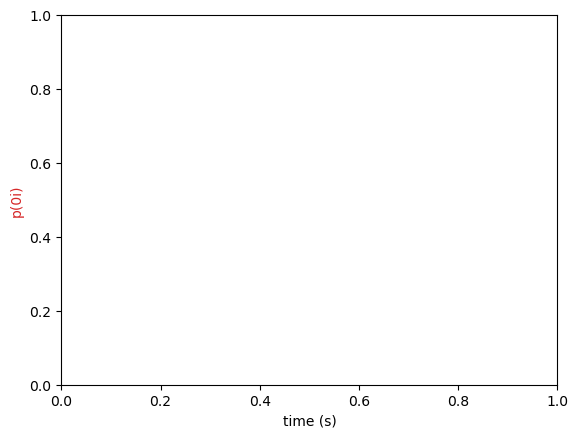

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('p(0i)', color= 'tab:red')
ax1.plot(tlist,p00list, color= 'tab:red')
ax1.plot(tlist,p01list, color= 'tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('<H>', color='tab:blue')  # we already handled the x-label with ax1
ax2.plot(tlist,Hvevtlist, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Evolución en la base autoestados de H

Sea $\{\ket{n}\}$ una base de autoestados de $H \, \Rightarrow \,H \ket{n} = E_n \ket{n}~~~~n=1,..,N.$

En esta base $H$ es una matriz $H_{mn}$ diagonal 

$$
H_{mn} =  \begin{bmatrix} E_0 &  & & \\  & E_1 &  & \\ & & \ddots & \\ & & & \end{bmatrix} =E_m \delta_{mn} \, .
$$

Entonces la matriz de evolución es también diagonal 

$$
U_{mn} = \exp\left(-\frac{i}{\hbar}t H_{mn}\right) = 
 \begin{bmatrix} e^{-\frac{i}{\hbar}t E_0} &  & & \\  & e^{-\frac{i}{\hbar} t E_1}  &  & \\ & & \ddots & \\ & & & \end{bmatrix} = e^{-\frac{i}{\hbar} t  E_m }\delta_{mn} \, .
$$

:::{admonition} En conclusión
:class: attention

- La evolución temporal de un autoestado de la energía es trivial (es una fase global)

$$
U(t,0)\ket{n} = e^{-\frac{i}{\hbar} t E_n} \ket{n}\, .
$$


- Esta fase deja de ser trivial cuando afecta a una combinación lineal. La forma más eficaz de calcular la evolución de un estado arbitrario es expresarla en la base $\{\ket{n}\}$. Es decir, si a $t=0$

$$
\ket{\psi(t=0)} = \sum_n c_n \ket{n} \, 
$$

entonces, a tiempo $t$ 

$$
\ket{\psi(t)} = \sum_n c_n e^{-\frac{i}{\hbar}E_n} \ket{n} \, .
$$

:::